### 결정트리
- 선형은 전처리에 문제가 있다, 데이터를 숫자로 변경해야하는 단점이 존재
- 위의 단점으로 단위 통일성 문제가 발생


In [114]:
import pandas as pd
import mglearn
import preamble

#### 그래프가 안나와요
- pip install Graphviz
- 별도로 graphviz.exe 설치필요
- https://www.graphviz.org/download/
- graphviz-x.x.x (64_bit) exe installer
- --Add Graphviz to the system Path for 'all users' --> 계속설치

#### 한글이 안 나와요!
- pip install git+https://github.com/sigmadream/koreanize-matplotlib.git
- import koreanize_matplotlib(preamble.py에 추가, !!plt 밑에!!)
- 기존의 한국어 설정 주석처리

In [115]:
#pip install git+https://github.com/sigmadream/koreanize-matplotlib.git

  Cloning https://github.com/sigmadream/koreanize-matplotlib.git to c:\users\user\appdata\local\temp\pip-req-build-t0myl04w
  Resolved https://github.com/sigmadream/koreanize-matplotlib.git to commit 0ac065145bcc630352094a19ecf29cd2179193a6
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: startedNote: you may need to restart the kernel to use updated packages.

  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/sigmadream/koreanize-matplotlib.git 'C:\Users\user\AppData\Local\Temp\pip-req-build-t0myl04w'

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# 결정트리와 랜덤 포레스트

In [116]:
from preamble import *

## 결정트리
- 장점 : 전처리에 민감하지 않음
- 단점 : 과대적합에 취약(데이터에 민감함)

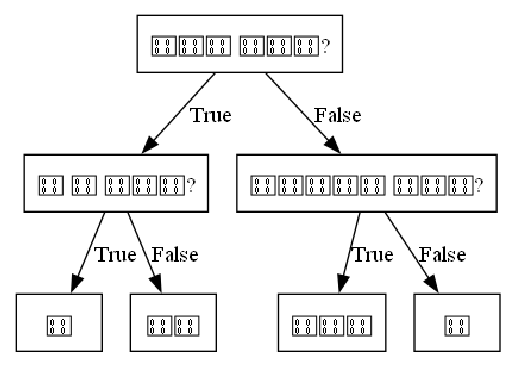

In [117]:
# 결정트리 예제
# TODO: 한국어 깨짐
mglearn.plots.plot_animal_tree()

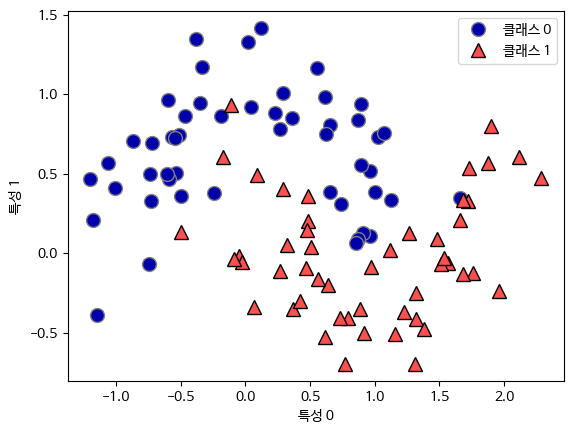

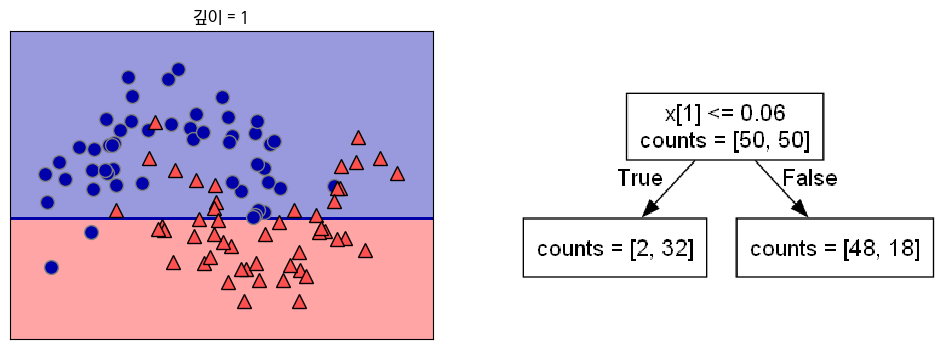

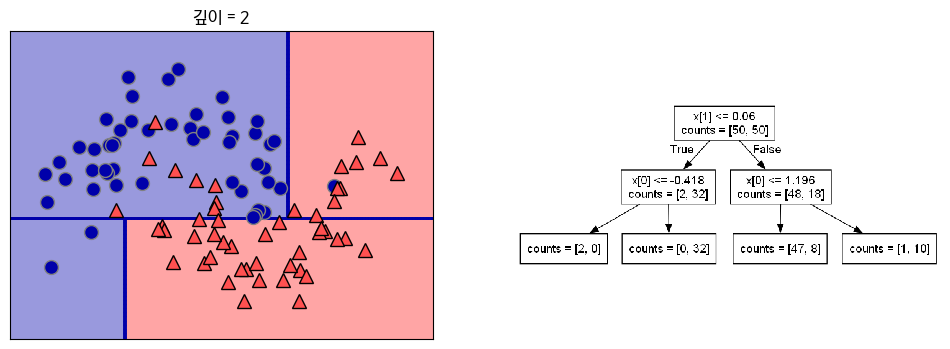

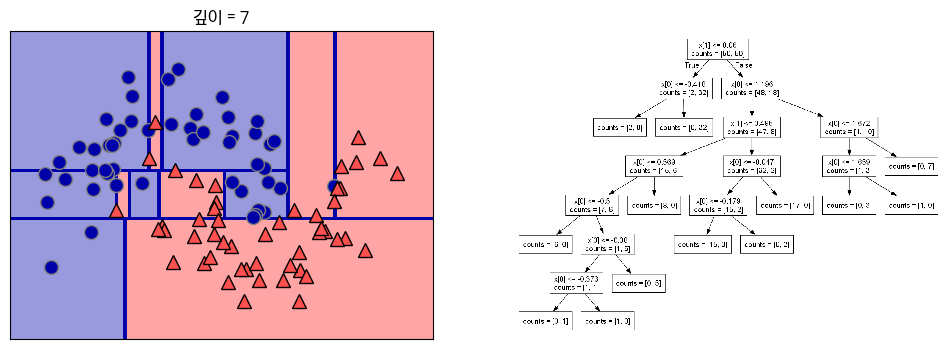

In [118]:
# 결정트리의 과정을 도식화
mglearn.plots.plot_tree_progressive()

## 일반적인 결정트리 학습

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, # stratify=cancer.target 추가하여 완화
                                                    random_state=42) 

tree = DecisionTreeClassifier(max_depth=4, random_state=42) ##max_depth 추가
tree.fit(X_train, y_train)
print(tree.score(X_train,y_train),tree.score(X_test, y_test))
# 전형적인 과대적합
# 과대적합을 없애려면 max_depth(트리의 차수 줄이기), stratify=cancer.target 추가하여 완화
# 한번 해보려면 max_depth, stratify 없이 출력한 다음에 하나씩 추가해보기
# stratifiy 는 층을 맞춰서 뽑아준다(회기에 사용하면 안된다!!), 만약 데이터가 균질하지 않다면, 데이터 말고 target

0.9882629107981221 0.9440559440559441


## 결정트리 시각화

In [120]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", 
                class_names=["악성", " 양성"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

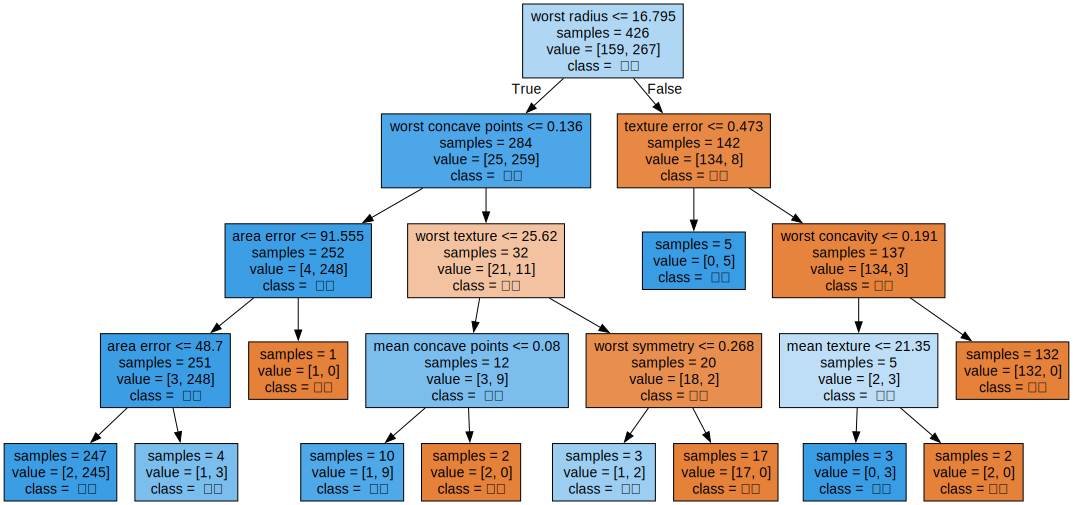

In [121]:
import graphviz
with open("tree.dot", encoding="UTF-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))
# 그래프를 설명할 수 있어야함. 결과가 어떠한 의미가 있는지에 대한, 그리고 어떻게 나오게 되었는지

### 특성 중요도

In [122]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

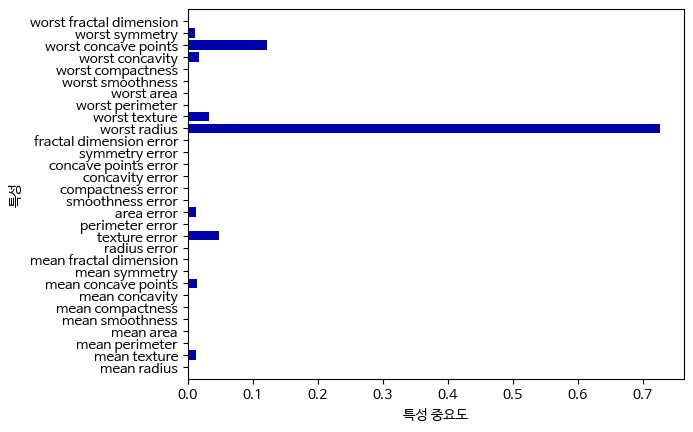

In [123]:
plot_feature_importances_cancer(tree)

In [124]:
tree.feature_importances_

array([0.   , 0.013, 0.   , 0.   , 0.   , 0.   , 0.   , 0.014, 0.   ,
       0.   , 0.   , 0.048, 0.   , 0.013, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.727, 0.033, 0.   , 0.   , 0.   , 0.   , 0.018,
       0.122, 0.012, 0.   ])

## 랜덤 포레스트

In [158]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target,
                                                    random_state=42) 

forest = RandomForestClassifier(n_estimators=100, random_state=42) 
forest.fit(X_train, y_train)
print(forest.score(X_train,y_train),forest.score(X_test, y_test))
##트리와 랜덤포레스트는 기본적인 구조는 비슷
##하지만, 학습구조에서 차이가 존재
##반드시 홀수 결을 만들어야함


1.0 0.958041958041958


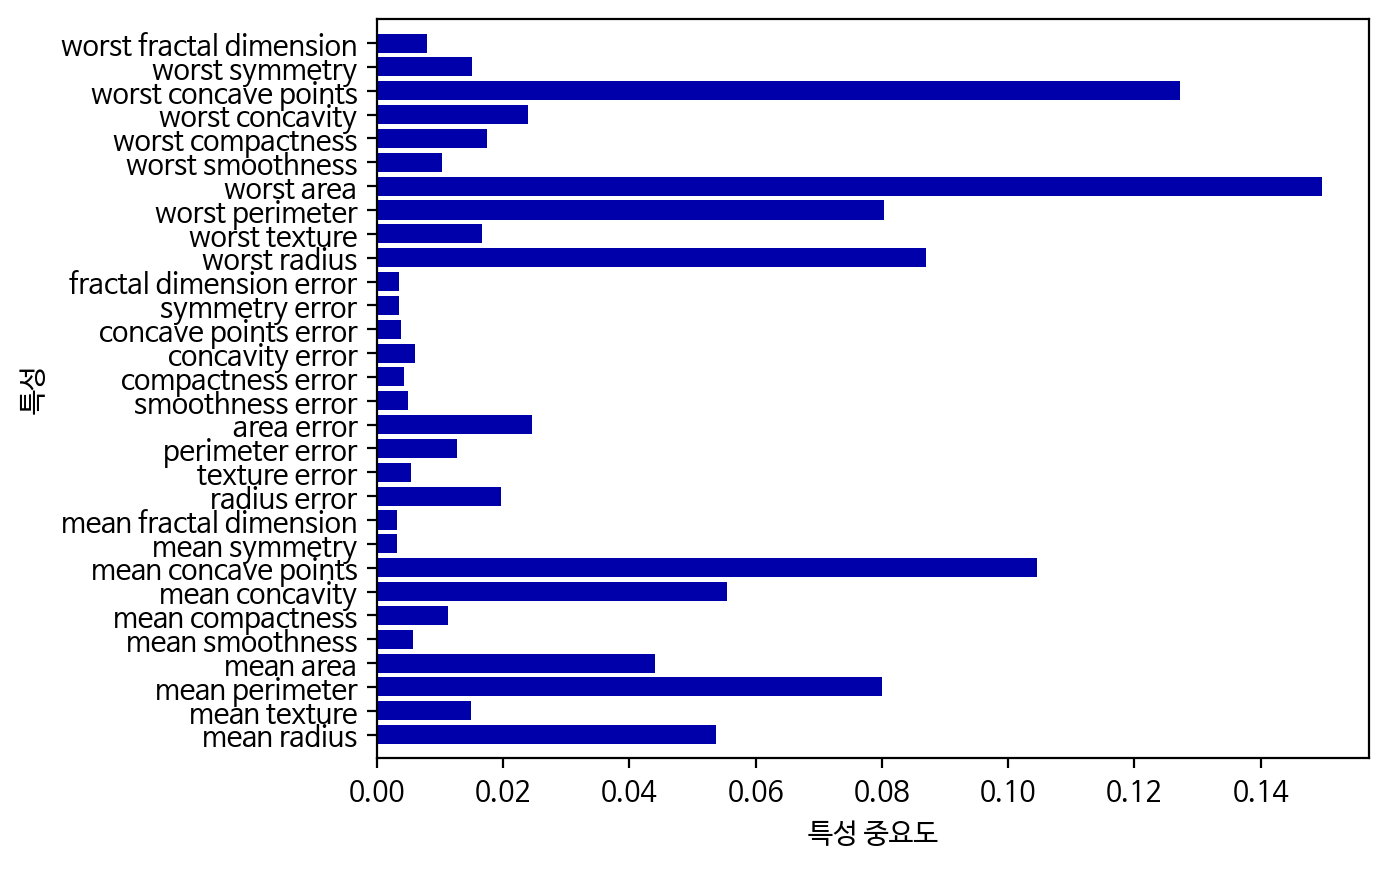

In [159]:
plot_feature_importances_cancer(forest)
# 5개의 그래프의 합산 값
# 데이터의 민감도는 확실이 눌러졌음
# 그러나 과대적합은 해결되지 않음

##### 결정트리
- 주요특징 파악
-
##### 랜덤포레스트
- 데이터 분류

##### xgBoost
- 


In [160]:
from sklearn.tree import export_graphviz

# 예측기 1개를 선택
# TODO: forest 전체값으로 변경
estimator = forest.estimators_[3]

export_graphviz(estimator, 
                out_file="forest.dot", 
                class_names=["악성","양성"],
                feature_names=cancer.feature_names, 
                impurity=False, 
                filled=True)

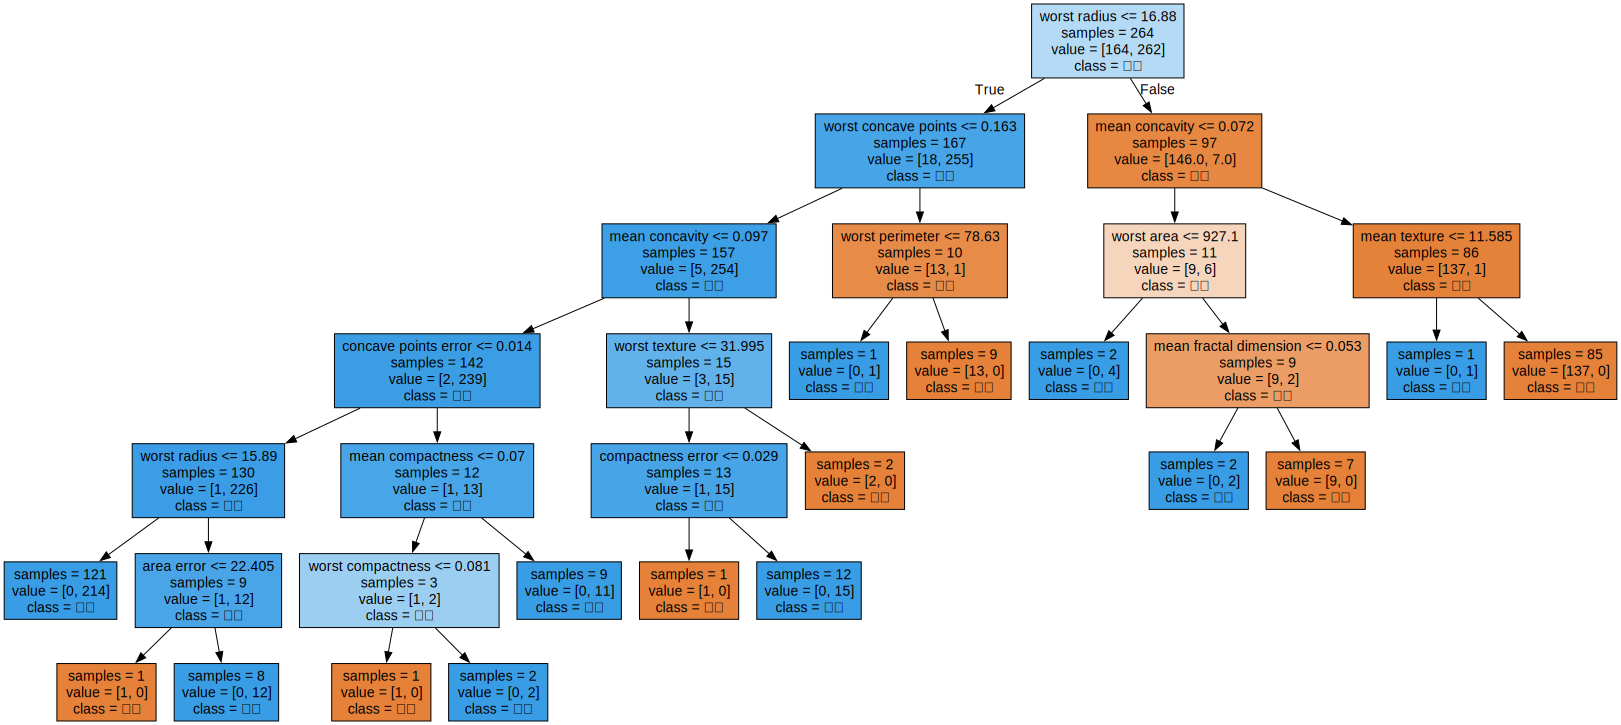

In [161]:
import graphviz
with open("forest.dot", encoding="utf-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))
# 그래프를 설명할 수 있어야함. 결과가 어떠한 의미가 있는지에 대한, 그리고 어떻게 나오게 되었는지

## 예제

In [ ]:
ram_prices = pd.read_csv("data/ram_price.csv")
ram_prices

,Unnamed: 0,date,price
0,0,1957.00,4.11e+08
1,1,1959.00,6.79e+07
2,2,1960.00,5.24e+06
3,3,1965.00,2.64e+06
4,4,1970.00,7.34e+05
...,...,...,...
328,328,2015.58,4.50e-03
329,329,2015.67,4.30e-03
330,330,2015.75,4.20e-03
331,331,2015.83,3.80e-03



### 데이터 시각화

In [131]:
%config InlineBackend.figure_format = 'retina'
#ipython에서만 가능함

Text(0, 0.5, '가격 ($/Mbyte)')

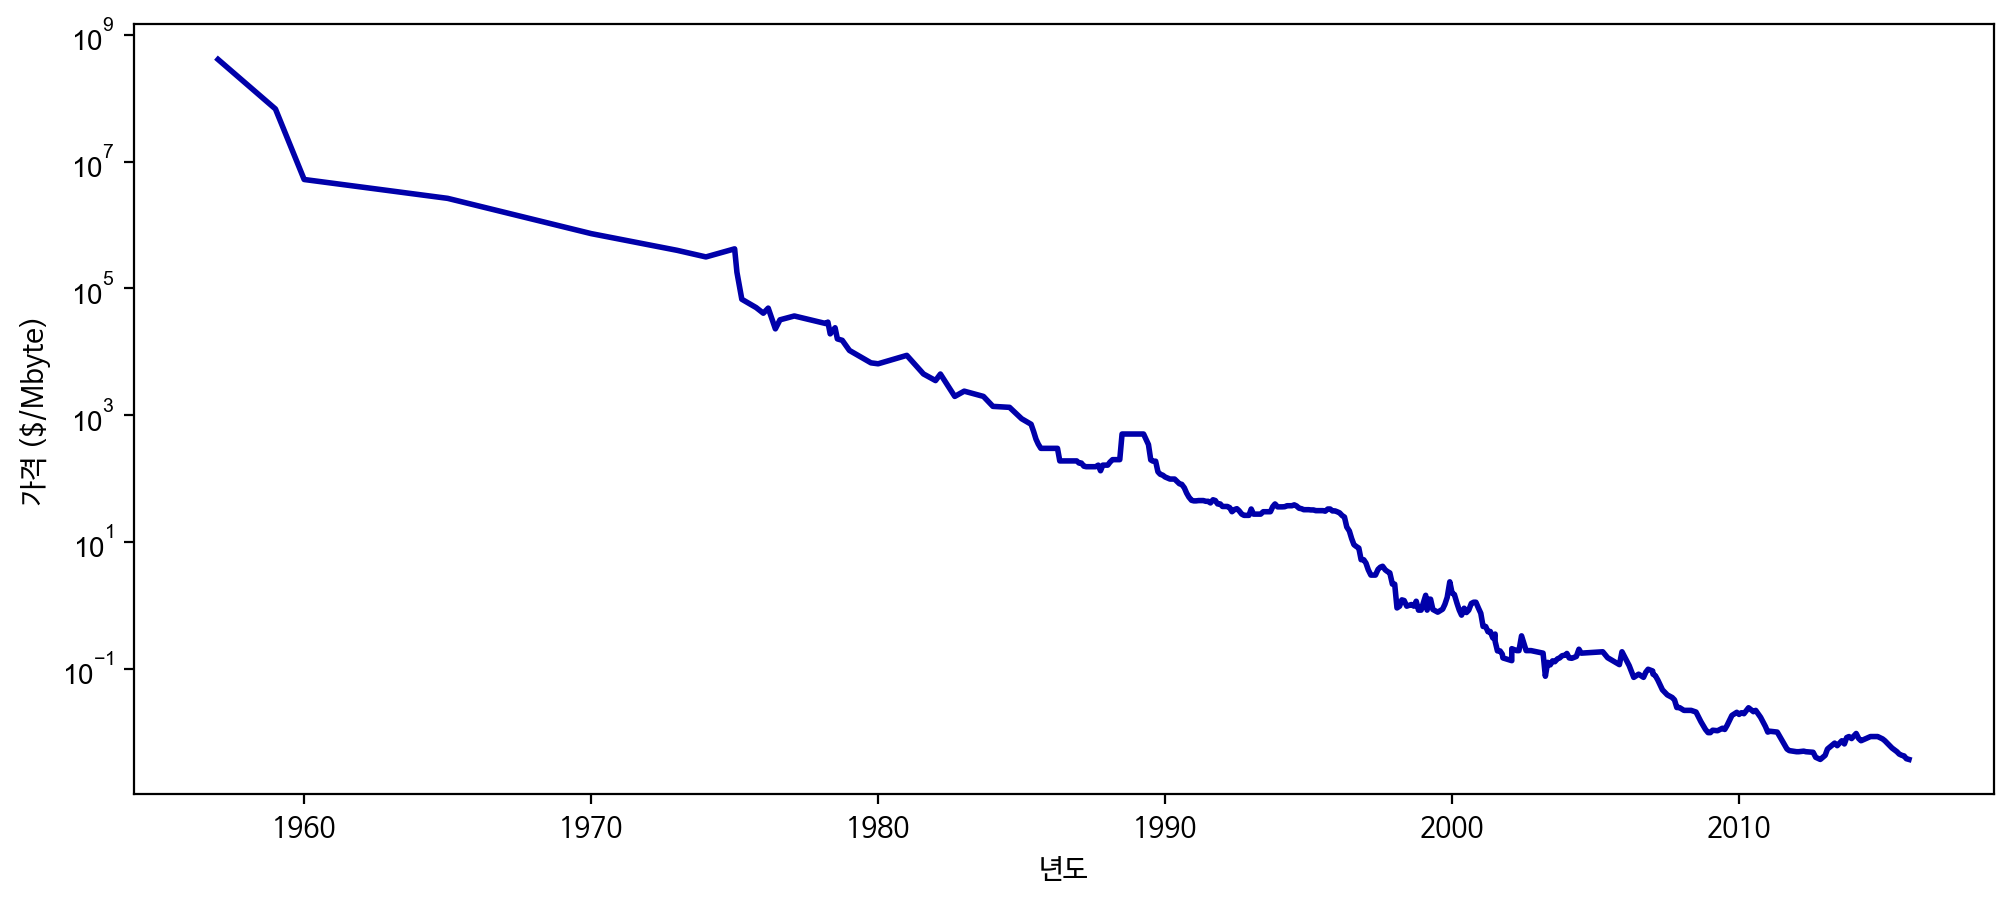

In [134]:
plt.figure(figsize=(12,5))
plt.yticks(fontname='Arial')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년도")
plt.ylabel("가격 ($/Mbyte)")

### 데이터준비

In [151]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

#가격 예측을 위해 날짜 특성만을 사용합니다
X_train = data_train.date.to_numpy()[:, np.newaxis]
#데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 변경
y_train = np.log(data_train.price)

### 학습

In [152]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
forest = RandomForestRegressor().fit(X_train, y_train)

#예측 은 전체 기간에 대해서 수행 # 시계열 데이터에서 자주 쓰는 방법
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
pred_fr = forest.predict(X_all)


In [153]:

#예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)
price_fr = np.exp(pred_fr)

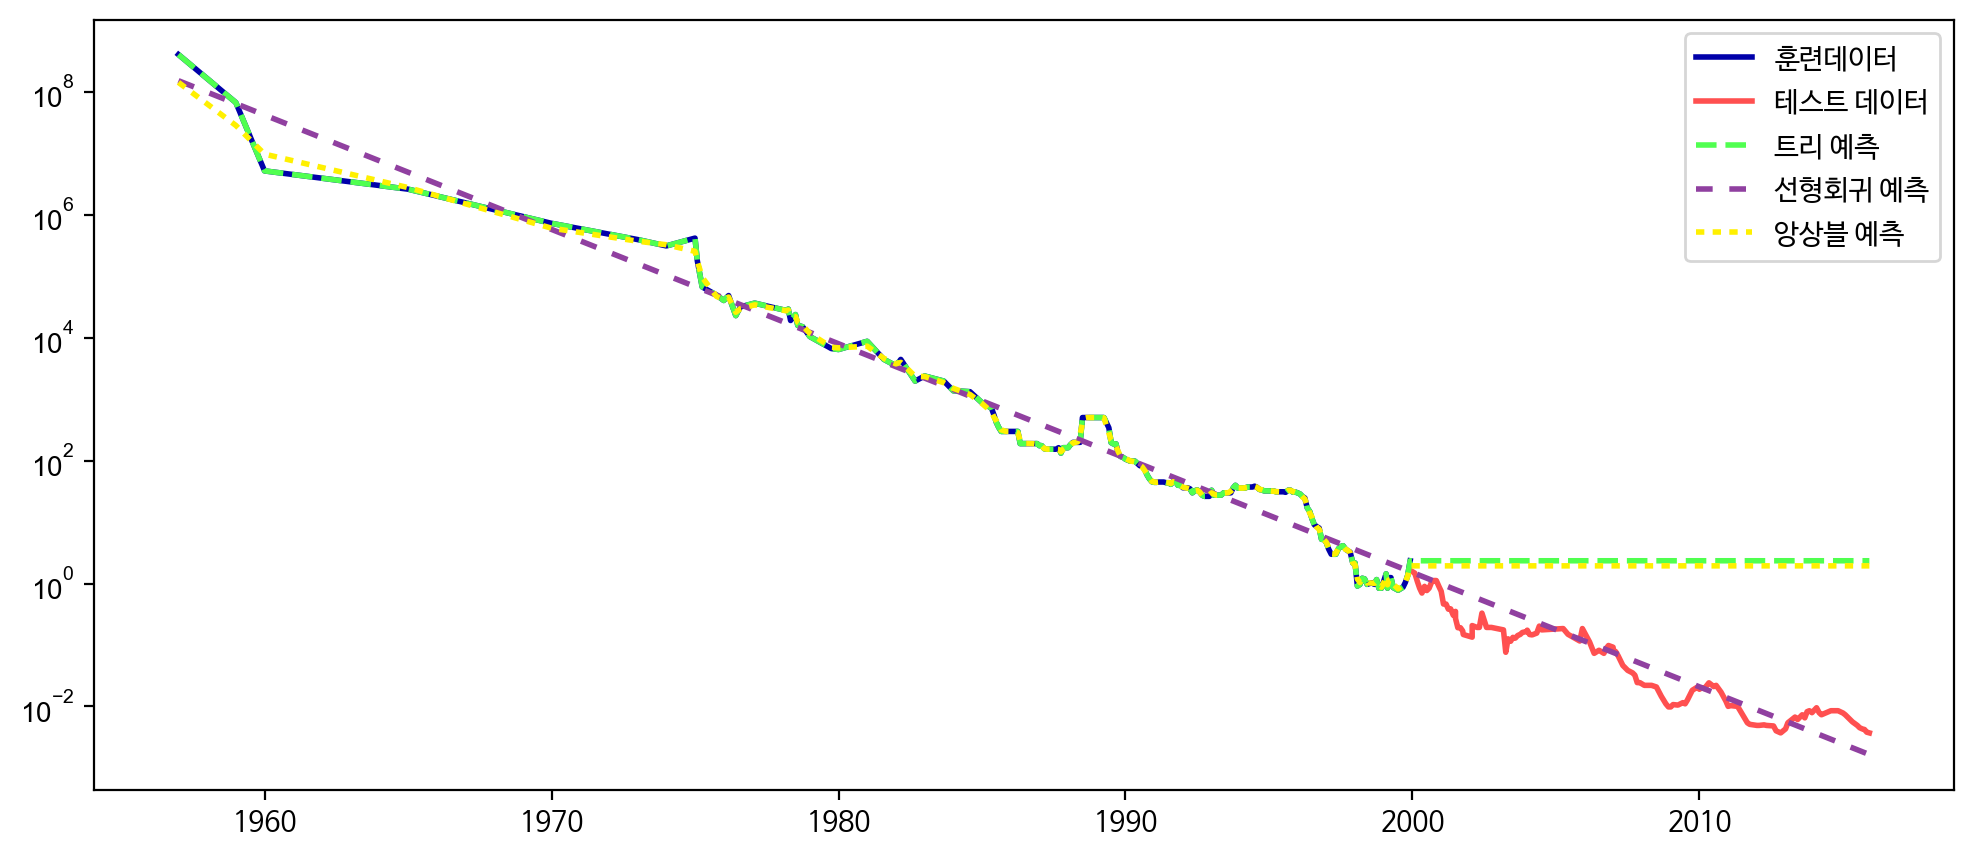

In [154]:
plt.figure(figsize=(12,5))
plt.yticks(fontname='Arial')
plt.semilogy(data_train.date, data_train.price, label="훈련데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.semilogy(ram_prices.date, price_fr, label="앙상블 예측")
plt.legend()

In [155]:
## 데이터가 많고 깨끗할 수록 매우 좋다